In [1]:
from tms_risk.cogmodels.fit_model import build_model, get_data
import os.path as op
import seaborn as sns

In [2]:
stimulation_palette = sns.color_palette()[2:4]
stimulation_order = ['Vertex', 'IPS']

In [3]:
bids_folder = '/data/ds-tmsrisk'
model_label = 'flexible2'

df = get_data(bids_folder, model_label=model_label)

target_folder = op.join(bids_folder, 'derivatives', 'cogmodels')

model = build_model(model_label, df)
model.build_estimation_model()
trace = model.sample(250, 250, target_accept=0.9)

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', 

Dropping the baseline condition
{'memory_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'memory_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'perceptual_noise_sd_spline5': {'mu_intercept': 5.0, 'sigma_

/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found memory_noise_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
/Users/gdehol/git/bauer/bauer/models.py:1488: UserWarning: Found perceptual_noise_sd in regressors, will add it for all 5 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [memory_noise_sd_spline1_mu, memory_noise_sd_spline1_sd, memory_noise_sd_spline1_offset, memory_noise_sd_spline2_mu, memory_noise_sd_spline2_sd, memory_noise_sd_spline2_offset, memory_noise_sd_spline3_mu, memory_noise_sd_spline3_sd, memory_noise_sd_spline3_offset, memory_noise_sd_spline4_mu, memory_noise_sd_spline4_sd, memory_noise_sd_spline4_offset, memory_noise_sd_spline5_mu, memory_noise_sd_spline5_sd, memory_noise_sd_spline5_offset, perce

Sampling 4 chains for 250 tune and 250 draw iterations (1_000 + 1_000 draws total) took 698 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [4]:
import pandas as pd

from bauer.utils.math import softplus_np
import numpy as np

from bauer.utils.plotting import plot_prediction
idata = trace

In [5]:
memory_noise_sd_ips = pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
memory_noise_sd_vertex = pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'memory_noise_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values


perceptual_noise_sd_ips = pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1)
perceptual_noise_sd_vertex = pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('Intercept', 0, -1) for ix in range(1, 6)], axis=1) + pd.concat([idata.posterior[f'perceptual_noise_sd_spline{ix}_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, -1) for ix in range(1, 6)], axis=1).values

x = np.arange(7, 112)
dm = model.make_dm(x)

def get_curve_posterior(evidence_sd_posterior):
    curve_posterior = evidence_sd_posterior.dot(dm.T)
    curve_posterior.columns = x
    curve_posterior.columns.name = 'x'

    return softplus_np(curve_posterior)

def get_curve_stats(evidence_sd_posterior):
    curve_posterior = get_curve_posterior(evidence_sd_posterior)

    return model.get_sd_curve_stats(curve_posterior.stack().to_frame('sd'))

for d in [memory_noise_sd_ips, memory_noise_sd_vertex, perceptual_noise_sd_ips, perceptual_noise_sd_vertex]:
    d.columns = range(5)

evidence_sd = pd.concat((memory_noise_sd_ips, memory_noise_sd_vertex, perceptual_noise_sd_ips, perceptual_noise_sd_vertex),axis=0,
                        keys=[('memory', 'IPS'), ('memory', 'Vertex'), ('perceptual', 'IPS'), ('perceptual', 'Vertex')], names=['n', 'TMS'])

curve_posterior = get_curve_posterior(evidence_sd)
curve_stats = evidence_sd.groupby(['n', 'TMS'], group_keys=True).apply(get_curve_stats)

array([[<Axes: title={'center': 'memory_noise_sd_spline1'}>,
        <Axes: title={'center': 'memory_noise_sd_spline1'}>],
       [<Axes: title={'center': 'memory_noise_sd_spline2'}>,
        <Axes: title={'center': 'memory_noise_sd_spline2'}>],
       [<Axes: title={'center': 'memory_noise_sd_spline3'}>,
        <Axes: title={'center': 'memory_noise_sd_spline3'}>],
       [<Axes: title={'center': 'memory_noise_sd_spline4'}>,
        <Axes: title={'center': 'memory_noise_sd_spline4'}>],
       [<Axes: title={'center': 'memory_noise_sd_spline5'}>,
        <Axes: title={'center': 'memory_noise_sd_spline5'}>],
       [<Axes: title={'center': 'perceptual_noise_sd_spline1'}>,
        <Axes: title={'center': 'perceptual_noise_sd_spline1'}>],
       [<Axes: title={'center': 'perceptual_noise_sd_spline2'}>,
        <Axes: title={'center': 'perceptual_noise_sd_spline2'}>],
       [<Axes: title={'center': 'perceptual_noise_sd_spline3'}>,
        <Axes: title={'center': 'perceptual_noise_sd_splin

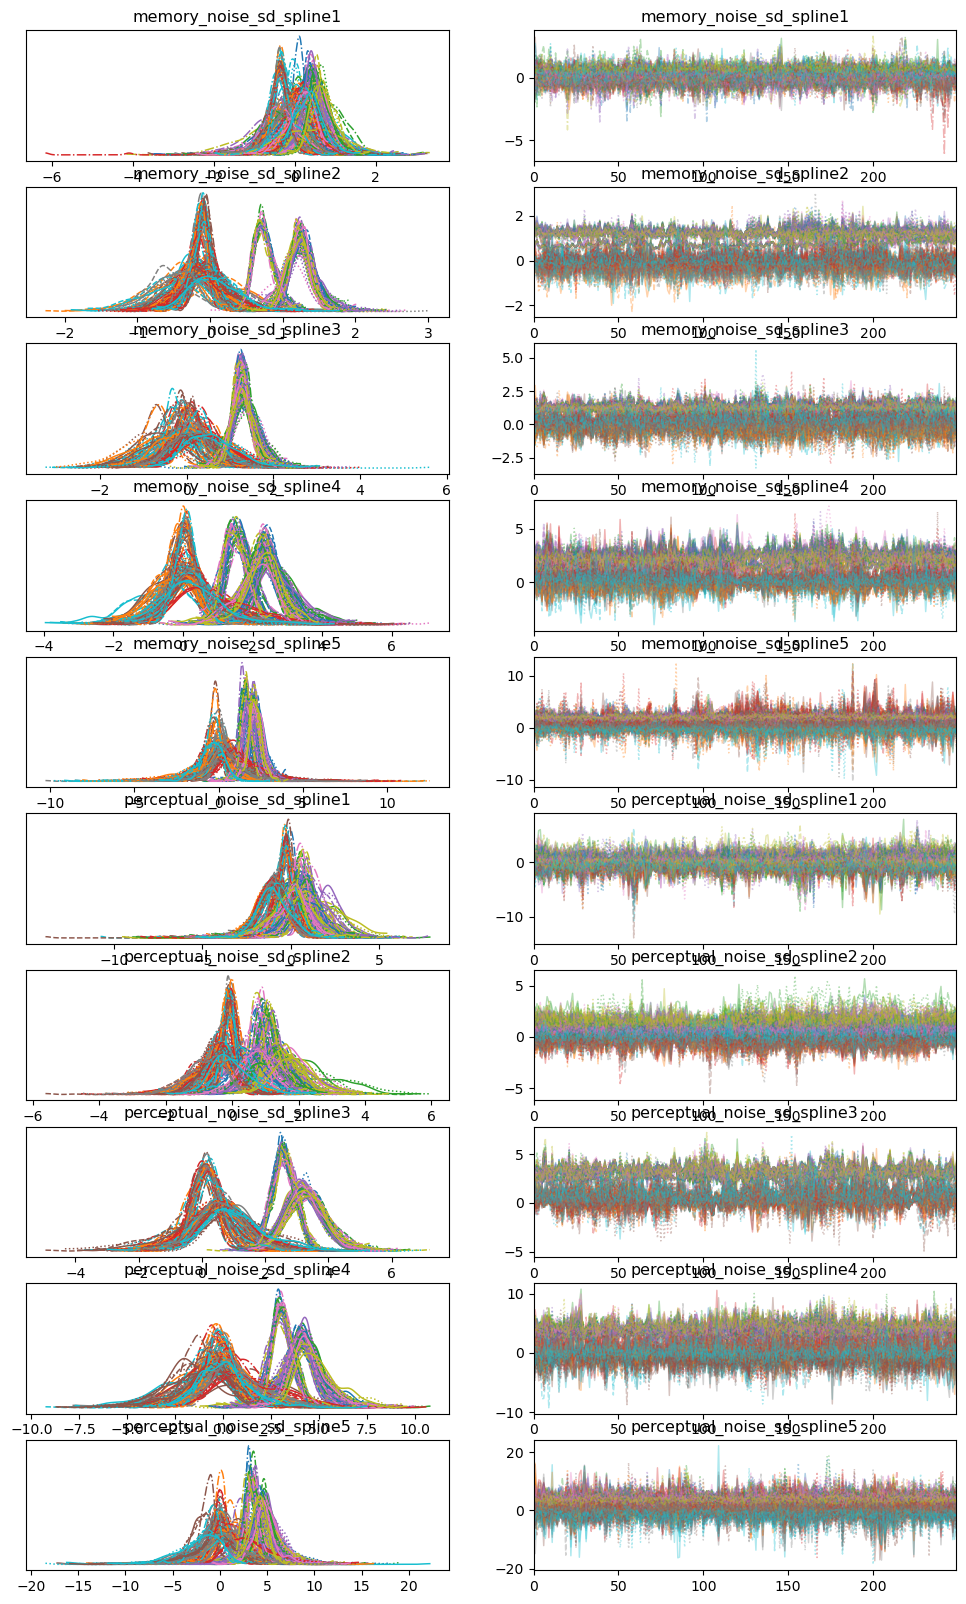

In [9]:
import arviz as az
az.plot_trace(idata.posterior, var_names=['memory_noise_sd_spline1', 'memory_noise_sd_spline2', 'memory_noise_sd_spline3', 'memory_noise_sd_spline4', 'memory_noise_sd_spline5', 'perceptual_noise_sd_spline1', 'perceptual_noise_sd_spline2', 'perceptual_noise_sd_spline3', 'perceptual_noise_sd_spline4', 'perceptual_noise_sd_spline5'])

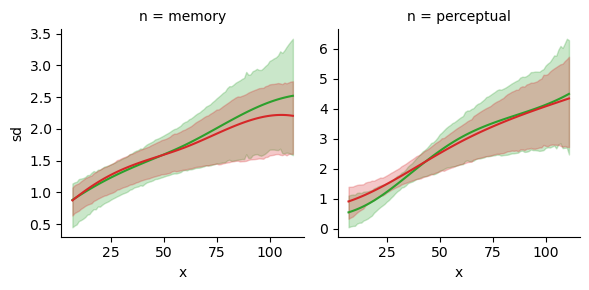

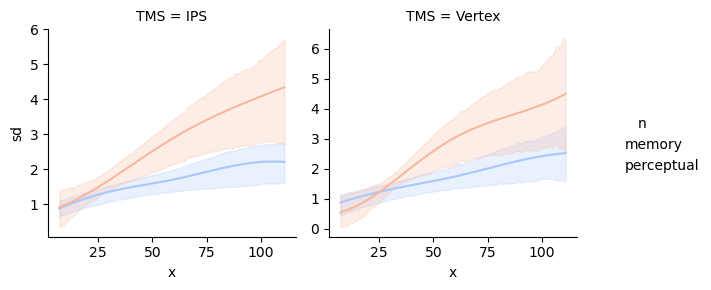

In [7]:

import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=['memory', 'perceptual'], hue_order=stimulation_order, sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
# g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

g = sns.FacetGrid(curve_stats.reset_index(), col='TMS', hue='n', palette=sns.color_palette('coolwarm', 2), sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
g.add_legend()

(7.0, 60.0)

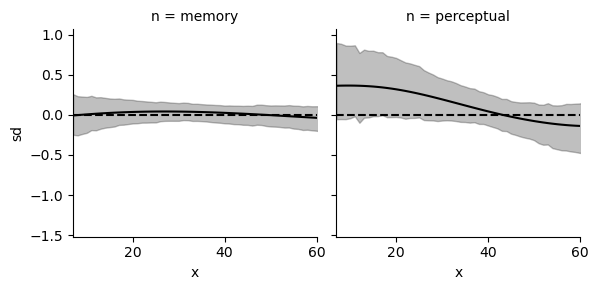

In [8]:
import matplotlib.pyplot as plt

tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby='n')

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

plt.xlim(7, 60)

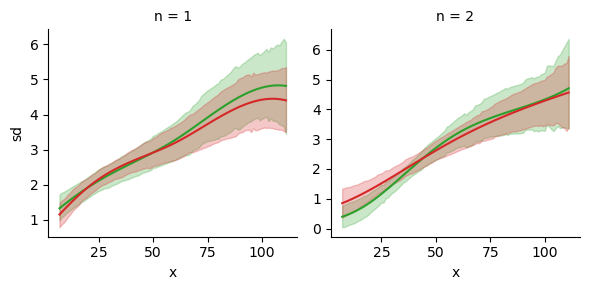

In [20]:

import seaborn as sns

g = sns.FacetGrid(curve_stats.reset_index(), col='n', hue='TMS', palette=stimulation_palette, col_order=[1, 2], hue_order=stimulation_order, sharey=False)

g.map_dataframe(plot_prediction, x='x', y='sd')
# g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

In [21]:
curve_posterior

x                         7         8         9    ...       109       110       111
n TMS    chain draw                                ...                              
1 IPS    0     0     1.167089  1.232466  1.296937  ...  4.328370  4.327206  4.323640
               1     1.211130  1.271151  1.330451  ...  3.808057  3.803721  3.797783
               2     1.067408  1.124971  1.181830  ...  3.620542  3.573470  3.521980
               3     1.020950  1.079496  1.137695  ...  3.924737  3.941165  3.956834
               4     1.089299  1.143426  1.196902  ...  3.644814  3.667935  3.690841
...                       ...       ...       ...  ...       ...       ...       ...
2 Vertex 3     245   0.410456  0.436433  0.463918  ...  3.442126  3.444363  3.447125
               246   0.256087  0.281108  0.308058  ...  2.492293  2.439826  2.385983
               247   0.691239  0.714156  0.738351  ...  4.145501  4.169889  4.195190
               248   0.200867  0.230730  0.263642  ...  4.691995  4.746638  4.802926
               249   0.182693  0.207671  0.235209  ...  4.977751  5.092534  5.212745

[4000 rows x 105 columns]

In [ ]:
tmp = repar_curve_posterior_stats.stack().to_frame('sd').unstack('TMS')['sd']

diff = tmp['IPS'] - tmp['Vertex']

In [29]:
import matplotlib.pyplot as plt

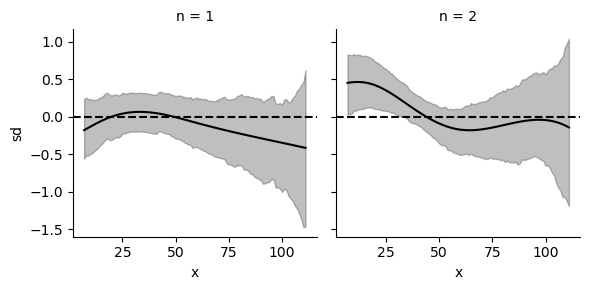

In [30]:
tmp = curve_posterior.stack().to_frame('sd').unstack('TMS')['sd']
diff = tmp['IPS'] - tmp['Vertex']

diff_stats = model.get_sd_curve_stats(diff.to_frame('sd'), groupby=['n'])

g = sns.FacetGrid(diff_stats.reset_index(), col='n')

g.map_dataframe(plot_prediction, x='x', y='sd', color='k')
g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--'))

In [38]:
diff.groupby(['x', 'n']).apply(lambda x:  (x<0.0).mean(0)).xs(2, level='n').iloc[:25]

x
7     0.014
8     0.014
9     0.013
10    0.010
11    0.007
12    0.007
13    0.007
14    0.006
15    0.006
16    0.006
17    0.006
18    0.006
19    0.006
20    0.005
21    0.005
22    0.004
23    0.004
24    0.007
25    0.009
26    0.012
27    0.014
28    0.017
29    0.019
30    0.020
31    0.023
dtype: float64

In [31]:
model.build_estimation_model()
ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=df)

ix_risky_first = ppc.index.get_level_values('risky_first')
ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

{'n1_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n1_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline1': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline2': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline3': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline4': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'n2_evidence_sd_spline5': {'mu_intercept': 5.0, 'sigma_intercept': 5.0, 'transform': 'identity'}, 'risky_prior_mu': {

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_25975/955365134.py", line 2, in <module>
    ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=df)
TypeError: BaseModel.ppc() got an unexpected keyword argument 'trace'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", li